In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import math as mt
import scipy as stats

In [2]:
from google.colab import files
files.upload=files.upload()

Saving 2.Temperatura_Instancia_2.xlsx to 2.Temperatura_Instancia_2.xlsx


# Patrón Utilizado

In [84]:
Datos=pd.read_excel('2.Temperatura_Instancia_2.xlsx')
Patron = pd.read_excel('2.Temperatura_Instancia_2.xlsx', sheet_name='Patrones') 
Info = Datos.copy() 
Patron_Utilizado = (Info[Info["ITEM"]=="PATRÓN UTILIZADO"])["DATO"].iloc[0]
T1 = Patron[Patron.PATRÓN.isin([Patron_Utilizado])]
T1 = T1.reset_index().drop(["index"], axis=1)
T1

,PATRÓN,UNIDAD DE MEDIDA,TEMPERATURA DE REFERENCIA,CORRECCIÓN A LA INDICACIÓN,DERIVA,Uexp (),INCERTIDUMBRE TÍPICA,K,RESOLUCIÓN,COEFICIENTE DE VARIACIÓN CON LA TEMPERATURA,TEMPERATURA DE CALIBRACIÓN
0,TERMÓMETRO DIGITAL + SONDA 2 (1622592),°C,-30.004,0.003,0.001064,0.0064,0.00320,2,0.001,0.003925,20.72
1,TERMÓMETRO DIGITAL + SONDA 2 (1622592),°C,-15.005,0.002,0.001241,0.0064,0.00320,2,0.001,0.003925,20.72
2,TERMÓMETRO DIGITAL + SONDA 2 (1622592),°C,-0.006,-0.001,0.000709,0.0064,0.00320,2,0.001,0.003925,20.72
3,TERMÓMETRO DIGITAL + SONDA 2 (1622592),°C,25.004,-0.013,0.001862,0.0069,0.00345,2,0.001,0.003925,20.72
4,TERMÓMETRO DIGITAL + SONDA 2 (1622592),°C,50.009,-0.014,0.002483,0.0069,0.00345,2,0.001,0.003925,20.72
5,TERMÓMETRO DIGITAL + SONDA 2 (1622592),°C,100.014,-0.010,0.002660,0.0079,0.00395,2,0.001,0.003925,20.72
6,TERMÓMETRO DIGITAL + SONDA 2 (1622592),°C,125.011,-0.006,0.002306,0.0079,0.00395,2,0.001,0.003925,20.72
7,TERMÓMETRO DIGITAL + SONDA 2 (1622592),°C,149.979,-0.003,0.003991,0.0079,0.00395,2,0.001,0.003925,20.72


# Medio de Calibración Utilizado

In [86]:
Medio = pd.read_excel('2.Temperatura_Instancia_2.xlsx', sheet_name='Medio_Calibracion') 
Medio_Utilizado = (Info[Info["ITEM"]=="MEDIO UTILIZADO"])["DATO"].iloc[0]
M1 = Medio[Medio.MEDIO.isin([Medio_Utilizado])]
M1["UNIFORMIDAD AXIAL"]=0
M1 = M1.reset_index().drop(["index"], axis=1)
M1

<ipython-input-86-ceb01b9e700a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M1["UNIFORMIDAD AXIAL"]=0


,MEDIO,UNIDAD DE MEDIDA,NOMINAL,ESTABILIDAD,UNIFORMIDAD RADIAL,UNIFORMIDAD AXIAL
0,BAÑO DE TEMPERATURA POLYSCIENCE,°C,-30,0.064,0.091,0
1,BAÑO DE TEMPERATURA POLYSCIENCE,°C,-15,0.066,0.094,0
2,BAÑO DE TEMPERATURA POLYSCIENCE,°C,0,0.047,0.096,0
3,BAÑO DE TEMPERATURA POLYSCIENCE,°C,25,0.035,0.045,0
4,BAÑO DE TEMPERATURA POLYSCIENCE,°C,50,0.009,0.039,0
5,BAÑO DE TEMPERATURA POLYSCIENCE,°C,100,0.020,0.063,0
6,BAÑO DE TEMPERATURA POLYSCIENCE,°C,150,0.040,0.065,0


# Interpolación Polinómica 

En esta parte establecemos el modelo de interpolación polinómica de grado 6

In [87]:
xi =T1["TEMPERATURA DE REFERENCIA"]
yi = T1["CORRECCIÓN A LA INDICACIÓN"]
xi = xi.reset_index(drop=True)
yi = yi.reset_index(drop=True)

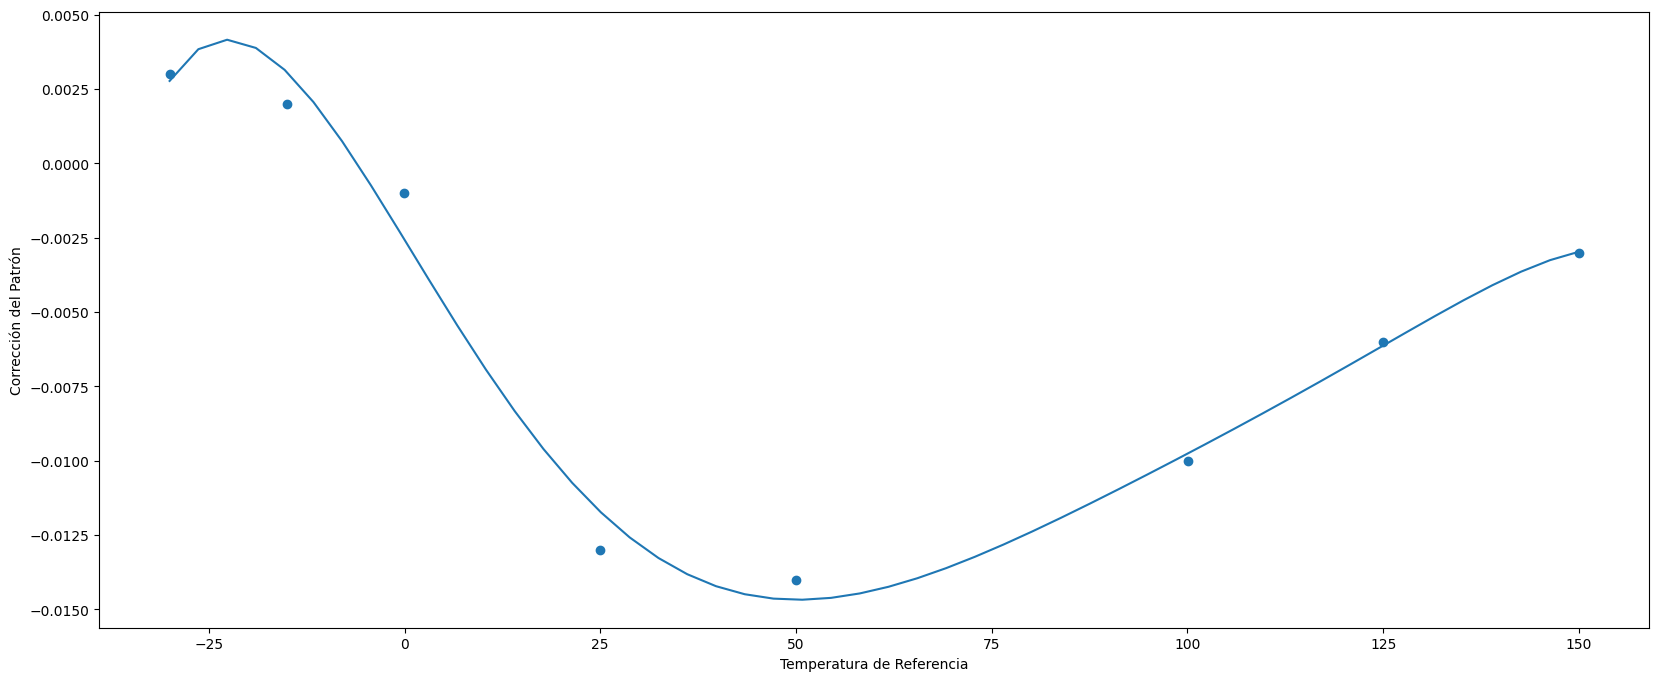

In [88]:
# Ajuste polinomial con grado = 6
Modelo = np.poly1d (np.polyfit (xi, yi, 6))  
polilínea = np.linspace (xi[0], xi[len(xi)-1])
plt.figure(figsize=(20,8))
plt.scatter(xi,yi)
plt.plot (polilínea, Modelo (polilínea))
plt.xlabel("Temperatura de Referencia")
plt.ylabel("Corrección del Patrón")
plt.show ()

In [89]:
C=Modelo
Coeficientes = pd.DataFrame(C)

# Residuos del Ajuste 

In [90]:
T2 = (T1.loc[:,['TEMPERATURA DE REFERENCIA','CORRECCIÓN A LA INDICACIÓN']])

T2["CORRECCIÓN AJUSTADA"] = Coeficientes.iloc[6,0]
T2["CORRECCIÓN AJUSTADA"] = (Coeficientes.iloc[0,0] * T2["TEMPERATURA DE REFERENCIA"].pow(6)) + (Coeficientes.iloc[1,0] * T2["TEMPERATURA DE REFERENCIA"].pow(5)) + (Coeficientes.iloc[2,0] * T2["TEMPERATURA DE REFERENCIA"].pow(4)) + (Coeficientes.iloc[3,0]*T2["TEMPERATURA DE REFERENCIA"].pow(3)) + (Coeficientes.iloc[4,0]*T2["TEMPERATURA DE REFERENCIA"].pow(2)) + (Coeficientes.iloc[5,0]*T2["TEMPERATURA DE REFERENCIA"]) + T2["CORRECCIÓN AJUSTADA"]
T2["RESIDUOS"] = T2["CORRECCIÓN A LA INDICACIÓN"] - T2["CORRECCIÓN AJUSTADA"]

In [91]:
T2.round(6)

,TEMPERATURA DE REFERENCIA,CORRECCIÓN A LA INDICACIÓN,CORRECCIÓN AJUSTADA,RESIDUOS
0,-30.004,0.003,0.002770,0.000230
1,-15.005,0.002,0.003064,-0.001064
2,-0.006,-0.001,-0.002567,0.001567
3,25.004,-0.013,-0.011718,-0.001282
4,50.009,-0.014,-0.014678,0.000678
5,100.014,-0.010,-0.009764,-0.000236
6,125.011,-0.006,-0.006130,0.000130
7,149.979,-0.003,-0.002976,-0.000024


# Mediciones

In [92]:
Mediciones = pd.read_excel('2.Temperatura_Instancia_2.xlsx', sheet_name='Mediciones')

# Cumplimiento Condiciones de Estabilidad



In [93]:
Estabilidad = pd.read_excel('2.Temperatura_Instancia_2.xlsx', sheet_name='Cump_Estabilidad')

Estabilidad = Estabilidad.rename(columns={'Unnamed: 1':'PATRÓN'})
Estabilidad["CORRECCIÓN DEL PATRÓN"] = Coeficientes.iloc[6,0]
Estabilidad["CORRECCIÓN DEL PATRÓN"] = (Coeficientes.iloc[0,0] * Estabilidad["PATRÓN"].pow(6)) + (Coeficientes.iloc[1,0] * Estabilidad["PATRÓN"].pow(5)) + (Coeficientes.iloc[2,0] * Estabilidad["PATRÓN"].pow(4)) + (Coeficientes.iloc[3,0]*Estabilidad["PATRÓN"].pow(3)) + (Coeficientes.iloc[4,0]*Estabilidad["PATRÓN"].pow(2)) + (Coeficientes.iloc[5,0]*Estabilidad["PATRÓN"]) + Estabilidad["CORRECCIÓN DEL PATRÓN"]
Estabilidad["VALOR DE REFERENCIA"] = Estabilidad["PATRÓN"]+ Estabilidad["CORRECCIÓN DEL PATRÓN"]

#Primera parte de la estabilidad
Estabilidad["ESTABILIDAD"] = 0
for i in range(0,len(Estabilidad),2):
  Estabilidad["ESTABILIDAD"].loc[i] = np.abs(Estabilidad["VALOR DE REFERENCIA"].loc[i+1] - Estabilidad["VALOR DE REFERENCIA"].loc[i])
Estabilidad 

#Segunda parte de la estabilidad
k=0
for j in range(1,len(Estabilidad),2):
    Estabilidad["ESTABILIDAD"].loc[j] = np.abs(Mediciones.iloc[k, [1,3,5,7,9,11]].max()  - Mediciones.iloc[k, [1,3,5,7,9,11]].min())
    k= k + 1

<ipython-input-93-261ac7c6e5a4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Estabilidad["ESTABILIDAD"].loc[i] = np.abs(Estabilidad["VALOR DE REFERENCIA"].loc[i+1] - Estabilidad["VALOR DE REFERENCIA"].loc[i])


In [94]:
# Esta función dvuelve el número más próximo a uno indicado 
def find_nearest(array, value): 
  indices = np.abs(np.subtract.outer(array, value)).argmin(0)
  return array[indices]

In [95]:
Estabilidad

,PUNTO DE MEDICIÓN,PATRÓN,CORRECCIÓN DEL PATRÓN,VALOR DE REFERENCIA,ESTABILIDAD
0,-15,-14.9740,0.003056,-14.970944,0.032991
1,-15,-15.0070,0.003065,-15.003935,0.013000
2,0,0.0100,-0.002574,0.007426,0.018992
3,0,0.0290,-0.002582,0.026418,0.010000
4,25,24.9370,-0.011701,24.925299,0.016996
5,25,24.9200,-0.011697,24.908303,0.013000
6,50,49.8584,-0.014678,49.843722,0.003400
7,50,49.8550,-0.014678,49.840322,0.017000
8,100,99.9810,-0.009768,99.971232,0.001000
9,100,99.9800,-0.009769,99.970231,0.002000


In [96]:
A= M1["NOMINAL"]
Estabilidad["REF_MEDIO"] = 0
Estabilidad["ESTB_MEDIO"] = 0
Estabilidad["UNIF RADIAL"] = 0
Estabilidad["UNIF AXIAL"] = 0
Estabilidad["CUMPLIMIENTO COND. ESTABILIDAD"] = 0

for m in range(0,len(Estabilidad)):
 Estabilidad.iloc[m,5] =  find_nearest(A,Estabilidad.iloc[m,0])
 Estabilidad.iloc[m,6] = M1.iloc[M1.index[M1['NOMINAL'] == Estabilidad.iloc[m,5]],3]
 Estabilidad.iloc[m,7] = M1.iloc[M1.index[M1['NOMINAL'] == Estabilidad.iloc[m,5]],4]
 Estabilidad.iloc[m,8] = M1.iloc[M1.index[M1['NOMINAL'] == Estabilidad.iloc[m,5]],5]
 if Estabilidad.iloc[m,4] < Estabilidad.iloc[m,6]:
   Estabilidad.iloc[m,9] = "Se cumple la condición de estabilidad requerida"
 else:
     Estabilidad.iloc[m,9] = "No se cumple la condición de estabilidad requerida"     
Estabilidad.drop("REF_MEDIO", axis=1)
Estabilidad

,PUNTO DE MEDICIÓN,PATRÓN,CORRECCIÓN DEL PATRÓN,VALOR DE REFERENCIA,ESTABILIDAD,REF_MEDIO,ESTB_MEDIO,UNIF RADIAL,UNIF AXIAL,CUMPLIMIENTO COND. ESTABILIDAD
0,-15,-14.9740,0.003056,-14.970944,0.032991,-15,0.066,0.094,0,Se cumple la condición de estabilidad requerida
1,-15,-15.0070,0.003065,-15.003935,0.013000,-15,0.066,0.094,0,Se cumple la condición de estabilidad requerida
2,0,0.0100,-0.002574,0.007426,0.018992,0,0.047,0.096,0,Se cumple la condición de estabilidad requerida
3,0,0.0290,-0.002582,0.026418,0.010000,0,0.047,0.096,0,Se cumple la condición de estabilidad requerida
4,25,24.9370,-0.011701,24.925299,0.016996,25,0.035,0.045,0,Se cumple la condición de estabilidad requerida
5,25,24.9200,-0.011697,24.908303,0.013000,25,0.035,0.045,0,Se cumple la condición de estabilidad requerida
6,50,49.8584,-0.014678,49.843722,0.003400,50,0.009,0.039,0,Se cumple la condición de estabilidad requerida
7,50,49.8550,-0.014678,49.840322,0.017000,50,0.009,0.039,0,No se cumple la condición de estabilidad reque...
8,100,99.9810,-0.009768,99.971232,0.001000,100,0.020,0.063,0,Se cumple la condición de estabilidad requerida
9,100,99.9800,-0.009769,99.970231,0.002000,100,0.020,0.063,0,Se cumple la condición de estabilidad requerida


In [97]:
#Correcciones del Patrón
Med_Patron = Mediciones.iloc[:,[0,1,3,5,7,9,11]]
Med_Patron = Med_Patron.rename(columns={"TEMPERATURA PROGRAMADA EN EL MEDIO ": "INDICACIÓN IBC"})
Med_Patron["INDICACIÓN IBC"] = Mediciones.iloc[:,[2,4,6,8,10,12]].T.mean()

Med_Patron["C1"] = Coeficientes.iloc[6,0]
Med_Patron["C1"] = (Coeficientes.iloc[0,0] * Med_Patron["P1"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P1"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P1"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P1"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P1"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P1"]) + Med_Patron["C1"]

Med_Patron["C2"] = Coeficientes.iloc[6,0]
Med_Patron["C2"] = (Coeficientes.iloc[0,0] * Med_Patron["P2"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P2"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P2"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P2"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P2"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P2"]) + Med_Patron["C2"]

Med_Patron["C3"] = Coeficientes.iloc[6,0]
Med_Patron["C3"] = (Coeficientes.iloc[0,0] * Med_Patron["P3"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P3"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P3"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P3"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P3"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P3"]) + Med_Patron["C3"]

Med_Patron["C4"] = Coeficientes.iloc[6,0]
Med_Patron["C4"] = (Coeficientes.iloc[0,0] * Med_Patron["P4"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P4"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P4"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P4"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P4"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P4"]) + Med_Patron["C4"]

Med_Patron["C5"] = Coeficientes.iloc[6,0]
Med_Patron["C5"] = (Coeficientes.iloc[0,0] * Med_Patron["P5"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P5"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P5"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P5"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P5"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P5"]) + Med_Patron["C5"]

Med_Patron["C6"] = Coeficientes.iloc[6,0]
Med_Patron["C6"] = (Coeficientes.iloc[0,0] * Med_Patron["P6"].pow(6)) + (Coeficientes.iloc[1,0]*Med_Patron["P6"].pow(5)) + (Coeficientes.iloc[2,0]*Med_Patron["P6"].pow(4)) + (Coeficientes.iloc[3,0]*Med_Patron["P6"].pow(3)) + (Coeficientes.iloc[4,0]*Med_Patron["P6"].pow(2)) + (Coeficientes.iloc[5,0]*Med_Patron["P6"]) + Med_Patron["C6"]

Med_Patron["VALOR DE REFERENCIA"] = Med_Patron.loc[:,Med_Patron.columns!="INDICACIÓN IBC"].T.sum()/6
Med_Patron["ERROR"] = Med_Patron["INDICACIÓN IBC"] - Med_Patron["VALOR DE REFERENCIA"]
Med_Patron


,INDICACIÓN IBC,P1,P2,P3,P4,P5,P6,C1,C2,C3,C4,C5,C6,VALOR DE REFERENCIA,ERROR
0,-14.1,-14.997,-14.992,-14.991,-14.999,-14.999,-14.986,0.003062,0.003061,0.003060,0.003062,0.003062,0.003059,-14.990939,0.890939
1,0.5,0.014,0.016,0.016,0.017,0.021,0.024,-0.002576,-0.002577,-0.002577,-0.002577,-0.002579,-0.002580,0.015422,0.484578
2,24.9,24.922,24.923,24.926,24.931,24.930,24.935,-0.011697,-0.011697,-0.011698,-0.011699,-0.011699,-0.011700,24.916135,-0.016135
3,49.5,49.854,49.852,49.851,49.846,49.842,49.837,-0.014678,-0.014678,-0.014678,-0.014678,-0.014678,-0.014678,49.832322,-0.332322
4,99.6,99.981,99.980,99.980,99.980,99.982,99.982,-0.009768,-0.009769,-0.009769,-0.009769,-0.009768,-0.009768,99.971065,-0.371065


# Patrones Auxiliares

In [98]:
Auxiliares = pd.read_excel('2.Temperatura_Instancia_2.xlsx', sheet_name='Auxiliares')

AuxiliarT = (Info[Info["ITEM"]=="EQUIPO 1  AUXILIARES A UTILIZAR T"])["DATO"].iloc[0]
AuxiliarHR = (Info[Info["ITEM"]=="EQUIPO 1  AUXILIARES A UTILIZAR HR"])["DATO"].iloc[0]
# AuxiliarP = (Info[Info["ITEM"]=="EQUIPO 1  AUXILIARES A UTILIZAR P"])["DATO"].iloc[0]

PA_T = Auxiliares[Auxiliares.PATRÓN.isin([AuxiliarT])]
PA_HR = Auxiliares[Auxiliares.PATRÓN.isin([AuxiliarHR])]
# PA_P = Auxiliares[Auxiliares.PATRÓN.isin([AuxiliarP])]


### Polinomios para los Patrones Auxiliares 

In [99]:
#Para Temperatura Tenemos
xit =PA_T["VALOR DE REFERENCIA "]
yit = PA_T["CORRECCIÓN A LA INDICACIÓN"]
xit = xit.reset_index(drop=True)
yit = yit.reset_index(drop=True)
Modelo1 = np.poly1d (np.polyfit (xit, yit, 2))  ##CAMBIAR ELGRADO DE LOS POLINOMIOS
CT= Modelo1
CoeficientesT = pd.DataFrame(CT)
polilínea1 = np.linspace (xit[0], xit[len(xit)-1])

#Para Humedad Tenemos
xih =PA_HR["VALOR DE REFERENCIA "]
yih = PA_HR["CORRECCIÓN A LA INDICACIÓN"]
xih = xih.reset_index(drop=True)
yih = yih.reset_index(drop=True)
Modelo2 = np.poly1d (np.polyfit (xih, yih, 2))  ##CAMBIAR ELGRADO DE LOS POLINOMIOS
CHR= Modelo2
CoeficientesHR = pd.DataFrame(CHR)
polilínea2 = np.linspace (xih[0], xih[len(xih)-1])

Text(0.5, 1.0, 'Curva de Corrección Humedad Relativa')

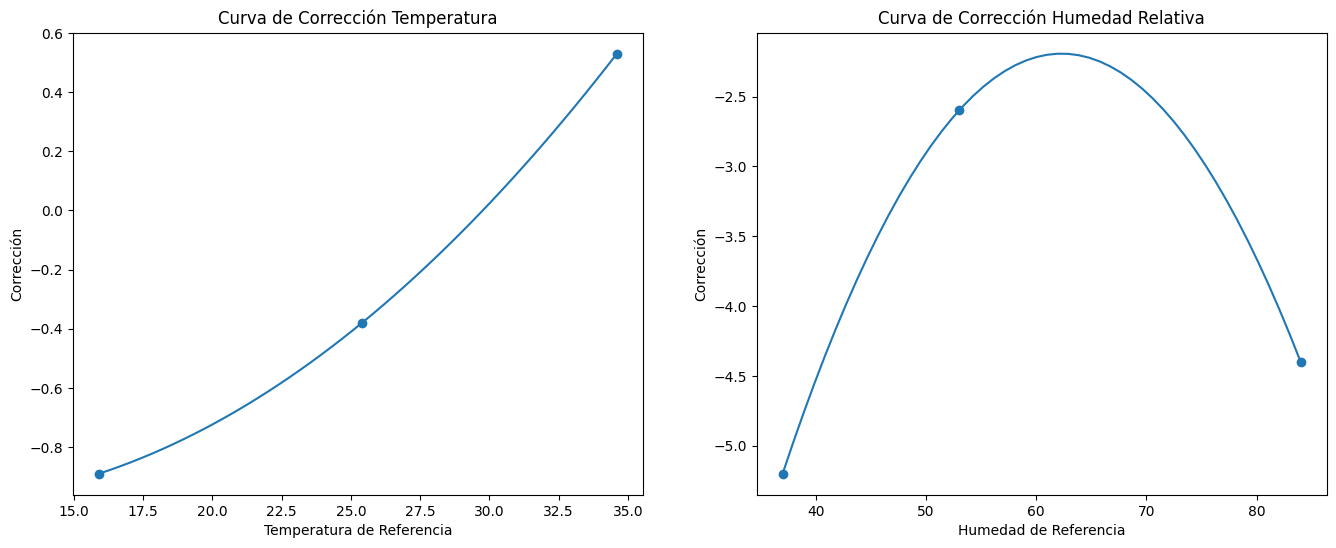

In [100]:
plt.figure(figsize=(25, 6))
plt.subplot(131)
plt.scatter(xit,yit)
plt.plot (polilínea1, Modelo1 (polilínea1))
plt.xlabel("Temperatura de Referencia")
plt.ylabel("Corrección")
plt.title('Curva de Corrección Temperatura')

plt.subplot(132)
plt.scatter(xih,yih)
plt.plot (polilínea2, Modelo2 (polilínea2))
plt.xlabel("Humedad de Referencia")
plt.ylabel("Corrección")
plt.title('Curva de Corrección Humedad Relativa')

In [101]:
Tmedia = ((Info[Info["ITEM"]=="TEMPERATURA MÍNIMA (°C)"])["DATO"].iloc[0] + (Info[Info["ITEM"]=="TEMPERATURA MÁXIMA (°C)"])["DATO"].iloc[0])/2
TCorregida = Tmedia + (CoeficientesT.iloc[0].iloc[0]*Tmedia**2 + CoeficientesT.iloc[1].iloc[0]*Tmedia + CoeficientesT.iloc[2].iloc[0])

# Incertidumbre de Medición

In [102]:
X=Estabilidad.loc[[0,2,4,6,8],["UNIF RADIAL", "UNIF AXIAL", "ESTB_MEDIO"], ].reset_index().drop(["index"], axis=1)


In [103]:
Coef = pd.read_excel('2.Temperatura_Instancia_2.xlsx', sheet_name='COE')    
Incertidumbre= Med_Patron.loc[:,['VALOR DE REFERENCIA','INDICACIÓN IBC']]
Incertidumbre["IT Calibración Patrón"] = (T1["INCERTIDUMBRE TÍPICA"].max()) * Coef.iloc[0,0]
Incertidumbre["IT Deriva Patrón"] = T1["DERIVA"].max() / (np.sqrt(3)) * Coef.iloc[1,0]
Incertidumbre["IT Res Patrón"] = (T1.iloc[0,8]/ (np.sqrt(12))) * Coef.iloc[2,0]
Incertidumbre["Interpolación"] = np.sqrt((((np.sum(T2["RESIDUOS"].pow(2)))))/(len(T1)-len(Coeficientes))) * Coef.iloc[3,0]
Incertidumbre["IT Magn Influencia"] = ((T1.iloc[0,9] * (TCorregida - T1.iloc[0,10])) / (np.sqrt(3))) * Coef.iloc[4,0]
Incertidumbre["IT Unif Radial"] = (X["UNIF RADIAL"] / np.sqrt(12)) * Coef.iloc[5,0]
Incertidumbre["IT Unif Axial"] = (X["UNIF AXIAL"] / np.sqrt(12)) * Coef.iloc[6,0]
Incertidumbre["IT Estab Medio"] = (X["ESTB_MEDIO"] / np.sqrt(12)) * Coef.iloc[7,0]
Incertidumbre["IT Rep Patrón"] = (Mediciones.iloc[:,[1,3,5,7,9,11]].T.std() / np.sqrt(6)) * Coef.iloc[8,0]
Incertidumbre["IT Resolución EBP"]=(((Info[Info["ITEM"]=="RESOLUCIÓN"])["DATO"].iloc[0])/np.sqrt(12)) * Coef.iloc[9,0]
Incertidumbre["IT Rep EBP"] = (Mediciones.iloc[:,[2,4,6,8,10,12]].T.std() / np.sqrt(6)) * Coef.iloc[10,0]
Incertidumbre["Metodo ANOVA"] = (pd.read_excel('2.Temperatura_Instancia_2.xlsx', sheet_name='Anova').iloc[0,0]) * Coef.iloc[11,0]
Incertidumbre["Combinada"] = np.sqrt(np.sum(Incertidumbre.iloc[:,2:14].pow(2).T))

### Grados Efectivos de Libertad

In [104]:
GL= pd.read_excel('2.Temperatura_Instancia_2.xlsx', sheet_name='gl')
GL=GL.drop([4],axis=0)
r=Incertidumbre.copy().drop(["IT Magn Influencia"], axis=1)
r.loc[5]=0
r.iloc[5,2:13]=GL.T
PRUEBA1 = Incertidumbre.iloc[:, 2:6]
PRUEBA2 = Incertidumbre.iloc[:, 7:15]
PRUEBA = pd.concat([PRUEBA1, PRUEBA2], axis=1).T
PRUEBA ["GL"] = 0
PRUEBA ["GL"] = r.iloc[5,2:14].T
PRUEBA.loc["veff"] = 0
PRUEBA.loc["veff",0] = PRUEBA.loc["Combinada",0]**4 / np.sum(PRUEBA.iloc[0:11, 0].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",1] = PRUEBA.loc["Combinada",1]**4 / np.sum(PRUEBA.iloc[0:11, 1].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",2] = PRUEBA.loc["Combinada",2]**4 / np.sum(PRUEBA.iloc[0:11, 2].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",3] = PRUEBA.loc["Combinada",3]**4 / np.sum(PRUEBA.iloc[0:11, 3].pow(4) / PRUEBA ["GL"])
PRUEBA.loc["veff",4] = PRUEBA.loc["Combinada",4]**4 / np.sum(PRUEBA.iloc[0:11, 4].pow(4) / PRUEBA ["GL"])
Incertidumbre["veff"] = (PRUEBA.loc["veff"]).T

In [66]:
from scipy.stats import t

In [105]:
Incertidumbre["K"] = np.round(t.ppf(q=0.95 + 0.05/2, df=Incertidumbre["veff"], loc=0, scale=1),5)
Incertidumbre["U Expandida"] = Incertidumbre["Combinada"] * Incertidumbre["K"]

In [106]:
Incertidumbre["veff"] = np.round(Incertidumbre["veff"],0)
Incertidumbre["K"] = np.round(Incertidumbre["K"],2)
Incertidumbre

,VALOR DE REFERENCIA,INDICACIÓN IBC,IT Calibración Patrón,IT Deriva Patrón,IT Res Patrón,Interpolación,IT Magn Influencia,IT Unif Radial,IT Unif Axial,IT Estab Medio,IT Rep Patrón,IT Resolución EBP,IT Rep EBP,Metodo ANOVA,Combinada,veff,K,U Expandida
0,-14.990939,-14.1,0.00395,0.002304,0.000289,0.002412,-0.000047,0.027135,0.0,0.019053,-0.002129,-0.028868,-0.000000e+00,0.006703,0.044821,562.0,1.96,0.088038
1,0.015422,0.5,0.00395,0.002304,0.000289,0.002412,-0.000047,0.027713,0.0,0.013568,-0.001528,-0.028868,-0.000000e+00,0.006703,0.043122,499.0,1.96,0.084723
2,24.916135,24.9,0.00395,0.002304,0.000289,0.002412,-0.000047,0.012990,0.0,0.010104,-0.002056,-0.028868,-1.588822e-15,0.006703,0.034353,347.0,1.97,0.067566
3,49.832322,49.5,0.00395,0.002304,0.000289,0.002412,-0.000047,0.011258,0.0,0.002598,-0.002683,-0.028868,-0.000000e+00,0.006703,0.032338,281.0,1.97,0.063657
4,99.971065,99.6,0.00395,0.002304,0.000289,0.002412,-0.000047,0.018187,0.0,0.005774,-0.000401,-0.028868,-6.355287e-15,0.006703,0.035628,369.0,1.97,0.070059


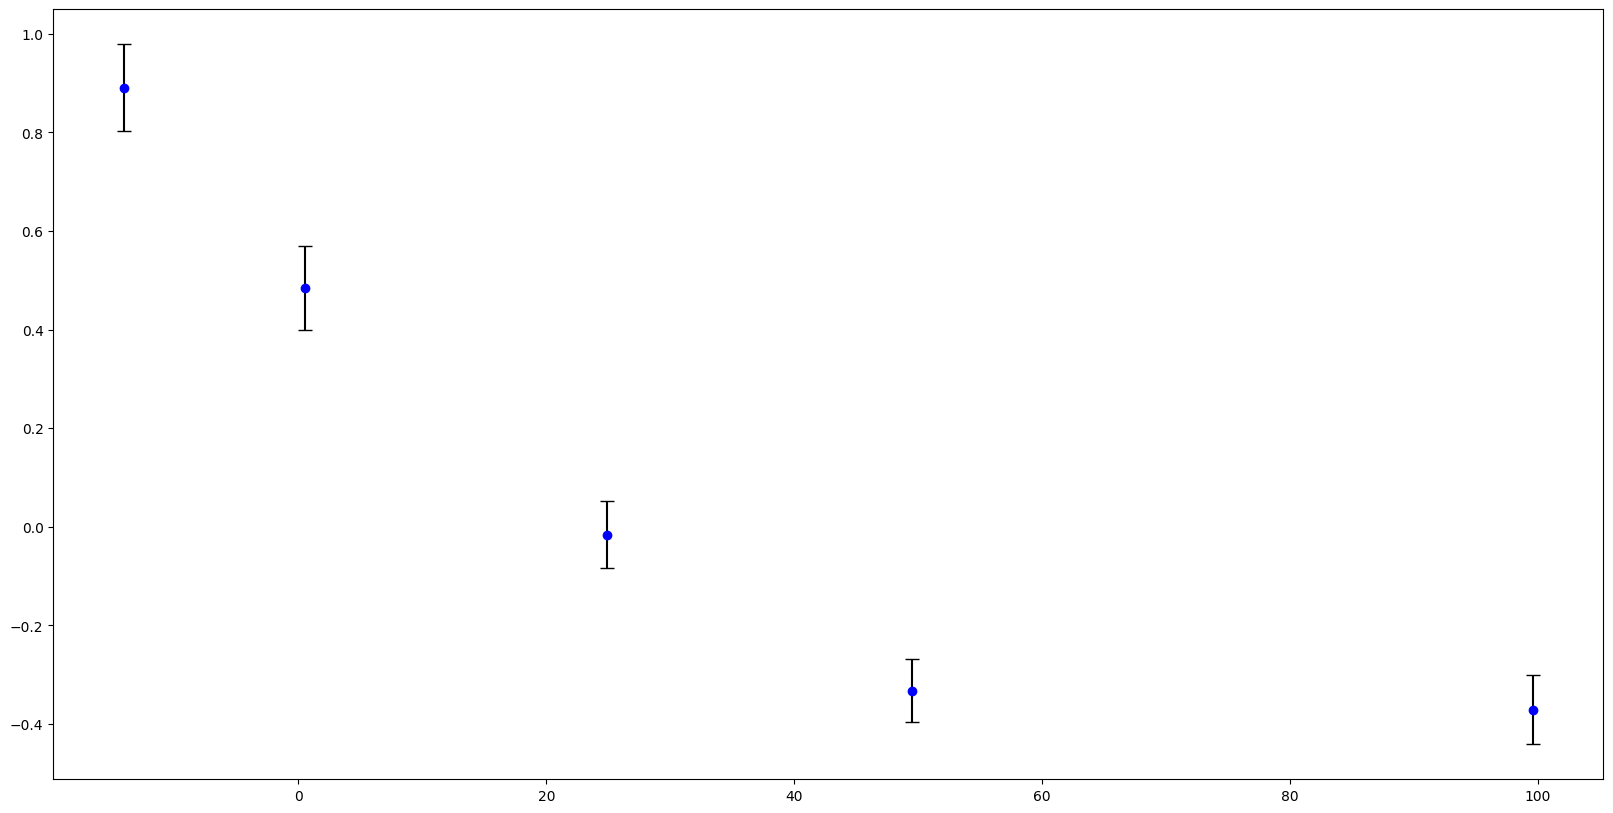

In [69]:
plt.figure(figsize=(20,10))
x=Med_Patron["INDICACIÓN IBC"]
y=Med_Patron["ERROR"]
plt.errorbar(x, y, yerr=Incertidumbre["U Expandida"], capsize=5, linestyle="None", fmt="ob", ecolor="k")
plt.show()